In [1]:
!pip install pyswarm

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4518 sha256=57aab5e9b963f1d9333e55ba2e4b47d45617bc83a688abf8d068213328c12261
  Stored in directory: /root/.cache/pip/wheels/93/15/89/3970ef96abd6123028010a90f007c4e6a2bed700db0aa2d36a
Successfully built pyswarm


In [2]:
# Data manipulation and preprocessing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Enables inline plotting in Jupyter/Colab notebooks
%matplotlib inline
np.set_printoptions(suppress=True)

# Scaling and model evaluation
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Machine learning models and tools
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import DBSCAN, KMeans

##=== Pandas ==
import pandas as pd

# === Imports ===
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')  # Only needed if you're loading data from Google Drive

Mounted at /content/drive


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [5]:
Data= pd.read_csv("/content/drive/MyDrive/Network Maintenace - With & without maintenace/Original-data/2017-2019 (with main).csv")

In [6]:
Data.shape

(5801, 22)

In [7]:
Data.head(10)

AADT_mean_x  AADT_Single_Unit_mean_x  AADT_Combination_mean_x  \
0      22429.0                    767.0                   4163.0   
1      22429.0                    767.0                   4163.0   
2       1964.0                     92.0                      6.0   
3       1222.0                     33.0                      2.0   
4       2182.0                    175.0                    242.0   
5      19601.0                    568.0                    196.0   
6      14674.0                    264.0                    205.0   
7      35793.0                   1432.0                    107.0   
8      10559.0                    443.0                     74.0   
9       7007.0                    126.0                     98.0   

   Future_AADT_mean_x  IRI_mean_x  Thickness_Rigid_mean_x  \
0             22430.0       101.0                    10.0   
1             22430.0       128.0                    10.0   
2              2750.0       287.0                     0.0   
3              1710.0       271.0                     0.0   
4              3060.0       245.5                     0.0   
5             27440.0       196.5                     0.0   
6             27000.0       219.8                     0.0   
7             50110.0       209.9                     0.0   
8             19430.0       359.0                     0.0   
9              9810.0       127.0                     0.0   

   Thickness_Flexible_mean_x  Base_Thickness_mean_x  F_System_mode  \
0                        0.0                    6.0              1   
1                        0.0                    6.0              1   
2                        3.0                    8.0              3   
3                        3.0                    8.0              3   
4                        3.0                    8.0              3   
5                        3.0                    8.0              3   
6                        3.0                    8.0              3   
7                        3.0                    6.0              3   
8                        3.0                    8.0              3   
9                        3.0                    6.0              3   

    Urban_Type  Surface_Type_mode  Base_Type_mode_x  Rutting_mean_x  \
0        rural                  3                 2             0.0   
1  small urban                  3                 2             0.0   
2        urban                  2                 3             0.1   
3        urban                  2                 3             0.1   
4        urban                  2                 3             0.3   
5        urban                  2                 3             0.2   
6        urban                  2                 3             0.2   
7        urban                  2                 3             0.2   
8        urban                  2                 3             0.1   
9        urban                  2                 3             0.0   

   Cracking_Percent_mean_x  Faulting_mean_x  Last_Overlay_Thickness_mean_x  \
0                      0.0              0.0                            3.5   
1                      0.0              0.0                            3.5   
2                      0.0              0.0                            1.5   
3                      0.0              0.0                            1.5   
4                      0.0              0.0                            1.5   
5                      0.5              0.0                            1.5   
6                      4.8              0.0                            1.5   
7                      0.8              0.0                            1.5   
8                      1.0              0.0                            1.5   
9                      0.0              0.0                            1.5   

   IRI_mean_y  RHU_AV_x  FRZ_IDX_x  TEMP_AVG_x  PRECIPITATION_x  Age_x  
0        89.0      76.0      896.3         7.3            979.6      8  
1       123.0      76.0 

In [8]:
Data['Urban_Type'].unique()

array(['rural', 'small urban', 'urban'], dtype=object)

In [9]:
# Filter rows where 'Urban_Code_mode' is 'rural'
rural_rows = Data[Data['Urban_Type'] == 'rural']

# Display the filtered DataFrame
rural_rows.count()

AADT_mean_x                      2285
AADT_Single_Unit_mean_x          2285
AADT_Combination_mean_x          2285
Future_AADT_mean_x               2285
IRI_mean_x                       2285
Thickness_Rigid_mean_x           2285
Thickness_Flexible_mean_x        2285
Base_Thickness_mean_x            2285
F_System_mode                    2285
Urban_Type                       2285
Surface_Type_mode                2285
Base_Type_mode_x                 2285
Rutting_mean_x                   2285
Cracking_Percent_mean_x          2285
Faulting_mean_x                  2285
Last_Overlay_Thickness_mean_x    2285
IRI_mean_y                       2285
RHU_AV_x                         2283
FRZ_IDX_x                        2283
TEMP_AVG_x                       2283
PRECIPITATION_x                  2283
Age_x                            2285
dtype: int64

In [10]:
def treatment_category(Last_Overlay_Thickness_mean_x):
    if Last_Overlay_Thickness_mean_x == 0:
        return 'Resurfacing'
    elif 0 < Last_Overlay_Thickness_mean_x <= 0.6:
        return 'Slurry Seal'
    elif 0.6 < Last_Overlay_Thickness_mean_x <= 3:
        return 'Thin Layers'
    elif Last_Overlay_Thickness_mean_x > 3:
        return 'Thick Layers'

In [11]:
## Now apply your treatment-category function
# Apply the transformation and insert the new column next to 'Urban_Code_mode'
Data.insert(Data.columns.get_loc('Last_Overlay_Thickness_mean_x') + 1, 'Treatment_type', Data['Last_Overlay_Thickness_mean_x'].apply(treatment_category))

# Display the updated DataFrame to check if the transformation is applied as expected
Data.head(10)

AADT_mean_x  AADT_Single_Unit_mean_x  AADT_Combination_mean_x  \
0      22429.0                    767.0                   4163.0   
1      22429.0                    767.0                   4163.0   
2       1964.0                     92.0                      6.0   
3       1222.0                     33.0                      2.0   
4       2182.0                    175.0                    242.0   
5      19601.0                    568.0                    196.0   
6      14674.0                    264.0                    205.0   
7      35793.0                   1432.0                    107.0   
8      10559.0                    443.0                     74.0   
9       7007.0                    126.0                     98.0   

   Future_AADT_mean_x  IRI_mean_x  Thickness_Rigid_mean_x  \
0             22430.0       101.0                    10.0   
1             22430.0       128.0                    10.0   
2              2750.0       287.0                     0.0   
3              1710.0       271.0                     0.0   
4              3060.0       245.5                     0.0   
5             27440.0       196.5                     0.0   
6             27000.0       219.8                     0.0   
7             50110.0       209.9                     0.0   
8             19430.0       359.0                     0.0   
9              9810.0       127.0                     0.0   

   Thickness_Flexible_mean_x  Base_Thickness_mean_x  F_System_mode  \
0                        0.0                    6.0              1   
1                        0.0                    6.0              1   
2                        3.0                    8.0              3   
3                        3.0                    8.0              3   
4                        3.0                    8.0              3   
5                        3.0                    8.0              3   
6                        3.0                    8.0              3   
7                        3.0                    6.0              3   
8                        3.0                    8.0              3   
9                        3.0                    6.0              3   

    Urban_Type  Surface_Type_mode  Base_Type_mode_x  Rutting_mean_x  \
0        rural                  3                 2             0.0   
1  small urban                  3                 2             0.0   
2        urban                  2                 3             0.1   
3        urban                  2                 3             0.1   
4        urban                  2                 3             0.3   
5        urban                  2                 3             0.2   
6        urban                  2                 3             0.2   
7        urban                  2                 3             0.2   
8        urban                  2                 3             0.1   
9        urban                  2                 3             0.0   

   Cracking_Percent_mean_x  Faulting_mean_x  Last_Overlay_Thickness_mean_x  \
0                      0.0              0.0                            3.5   
1                      0.0              0.0                            3.5   
2                      0.0              0.0                            1.5   
3                      0.0              0.0                            1.5   
4                      0.0              0.0                            1.5   
5                      0.5              0.0                            1.5   
6                      4.8              0.0                            1.5   
7                      0.8              0.0                            1.5   
8                      1.0              0.0                            1.5   
9                      0.0              0.0                            1.5   

  Treatment_type  IRI_mean_y  RHU_AV_x  FRZ_IDX_x  TEMP_AVG_x  \
0   Thick Layers        89.0      76.0      896.3         7.3   
1   Thick Layers       123.0      76.0  

In [12]:
Data['Treatment_type'].unique()

array(['Thick Layers', 'Thin Layers', 'Resurfacing'], dtype=object)

In [13]:
Data['Treatment_type'].count()

np.int64(5801)

In [14]:
Data.dtypes

AADT_mean_x                      float64
AADT_Single_Unit_mean_x          float64
AADT_Combination_mean_x          float64
Future_AADT_mean_x               float64
IRI_mean_x                       float64
Thickness_Rigid_mean_x           float64
Thickness_Flexible_mean_x        float64
Base_Thickness_mean_x            float64
F_System_mode                      int64
Urban_Type                        object
Surface_Type_mode                  int64
Base_Type_mode_x                   int64
Rutting_mean_x                   float64
Cracking_Percent_mean_x          float64
Faulting_mean_x                  float64
Last_Overlay_Thickness_mean_x    float64
Treatment_type                    object
IRI_mean_y                       float64
RHU_AV_x                         float64
FRZ_IDX_x                        float64
TEMP_AVG_x                       float64
PRECIPITATION_x                  float64
Age_x                              int64
dtype: object

In [15]:
Data.columns

Index(['AADT_mean_x', 'AADT_Single_Unit_mean_x', 'AADT_Combination_mean_x',
       'Future_AADT_mean_x', 'IRI_mean_x', 'Thickness_Rigid_mean_x',
       'Thickness_Flexible_mean_x', 'Base_Thickness_mean_x', 'F_System_mode',
       'Urban_Type', 'Surface_Type_mode', 'Base_Type_mode_x', 'Rutting_mean_x',
       'Cracking_Percent_mean_x', 'Faulting_mean_x',
       'Last_Overlay_Thickness_mean_x', 'Treatment_type', 'IRI_mean_y',
       'RHU_AV_x', 'FRZ_IDX_x', 'TEMP_AVG_x', 'PRECIPITATION_x', 'Age_x'],
      dtype='object')

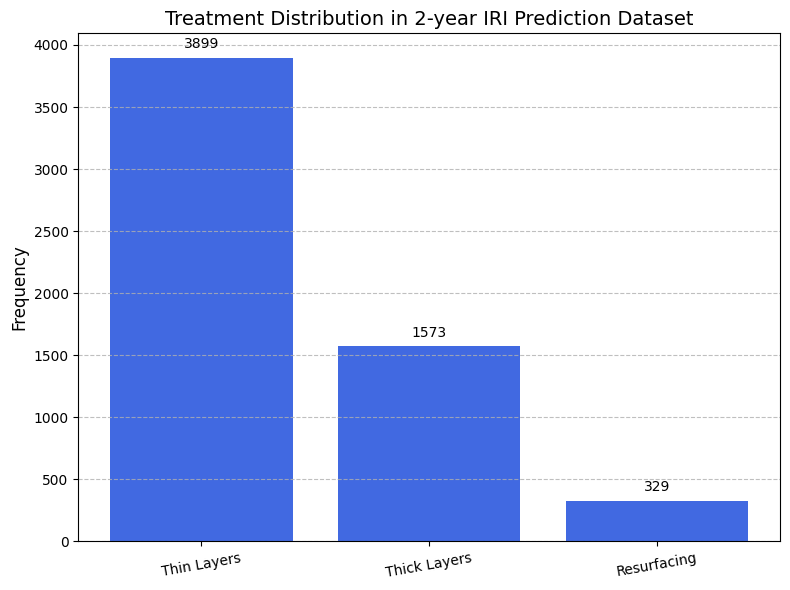

In [16]:
import matplotlib.pyplot as plt

# Count treatment types
treatment_counts = Data['Treatment_type'].value_counts()

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(treatment_counts.index, treatment_counts.values, color='royalblue')

# Add annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f'{int(yval)}', ha='center', va='bottom', fontsize=10)

# Customize chart
plt.title("Treatment Distribution in 2-year IRI Prediction Dataset", fontsize=14)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=10)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()


In [17]:
categorical_columns = Data[['Urban_Type','Treatment_type']]

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(categorical_columns)

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Urban_Type','Treatment_type']))

df_encoded = pd.concat([Data, one_hot_df], axis=1)

df_encoded_2017_2019 = df_encoded.drop(categorical_columns, axis=1) ## Change this name to df_encoded_2017_2019


In [18]:
df_encoded_2017_2019.head(10)

AADT_mean_x  AADT_Single_Unit_mean_x  AADT_Combination_mean_x  \
0      22429.0                    767.0                   4163.0   
1      22429.0                    767.0                   4163.0   
2       1964.0                     92.0                      6.0   
3       1222.0                     33.0                      2.0   
4       2182.0                    175.0                    242.0   
5      19601.0                    568.0                    196.0   
6      14674.0                    264.0                    205.0   
7      35793.0                   1432.0                    107.0   
8      10559.0                    443.0                     74.0   
9       7007.0                    126.0                     98.0   

   Future_AADT_mean_x  IRI_mean_x  Thickness_Rigid_mean_x  \
0             22430.0       101.0                    10.0   
1             22430.0       128.0                    10.0   
2              2750.0       287.0                     0.0   
3              1710.0       271.0                     0.0   
4              3060.0       245.5                     0.0   
5             27440.0       196.5                     0.0   
6             27000.0       219.8                     0.0   
7             50110.0       209.9                     0.0   
8             19430.0       359.0                     0.0   
9              9810.0       127.0                     0.0   

   Thickness_Flexible_mean_x  Base_Thickness_mean_x  F_System_mode  \
0                        0.0                    6.0              1   
1                        0.0                    6.0              1   
2                        3.0                    8.0              3   
3                        3.0                    8.0              3   
4                        3.0                    8.0              3   
5                        3.0                    8.0              3   
6                        3.0                    8.0              3   
7                        3.0                    6.0              3   
8                        3.0                    8.0              3   
9                        3.0                    6.0              3   

   Surface_Type_mode  Base_Type_mode_x  Rutting_mean_x  \
0                  3                 2             0.0   
1                  3                 2             0.0   
2                  2                 3             0.1   
3                  2                 3             0.1   
4                  2                 3             0.3   
5                  2                 3             0.2   
6                  2                 3             0.2   
7                  2                 3             0.2   
8                  2                 3             0.1   
9                  2                 3             0.0   

   Cracking_Percent_mean_x  Faulting_mean_x  Last_Overlay_Thickness_mean_x  \
0                      0.0              0.0                            3.5   
1                      0.0              0.0                            3.5   
2                      0.0              0.0                            1.5   
3                      0.0              0.0                            1.5   
4                      0.0              0.0                            1.5   
5                      0.5              0.0                            1.5   
6                      4.8              0.0                            1.5   
7                      0.8              0.0                            1.5   
8                      1.0              0.0                            1.5   
9                      0.0              0.0                            1.5   

   IRI_mean_y  RHU_AV_x  FRZ_IDX_x  TEMP_AVG_x  PRECIPITATION_x  Age_x  \
0        89.0      76.0      896.3         7.3            979.6      8   
1       123.0      76.0      896.3         7.3            979.6      8   
2       176.0      67.6        1.1        20.3            894.7     72   
3       222.0    

In [19]:
df_thin_layers = df_encoded_2017_2019[df_encoded_2017_2019['Treatment_type_Thin Layers'] == 1]
print(df_thin_layers.shape)
print("Rural datapoints in thin layer treatments:", df_thin_layers[df_thin_layers['Urban_Type_rural'] == 1].count())
print("Small Urban datapoints in thin layer treatments:", df_thin_layers[df_thin_layers['Urban_Type_small urban'] ==1].count())
print("Urban datapoints in thin layer treatments:", df_thin_layers[df_thin_layers['Urban_Type_urban'] ==1].count())
df_thin_layers.to_csv("df_thin_layers_2017_2020.csv", index=False)
df_thin_layers.head(10)

(3899, 27)
Rural datapoints in thin layer treatments: AADT_mean_x                      1408
AADT_Single_Unit_mean_x          1408
AADT_Combination_mean_x          1408
Future_AADT_mean_x               1408
IRI_mean_x                       1408
Thickness_Rigid_mean_x           1408
Thickness_Flexible_mean_x        1408
Base_Thickness_mean_x            1408
F_System_mode                    1408
Surface_Type_mode                1408
Base_Type_mode_x                 1408
Rutting_mean_x                   1408
Cracking_Percent_mean_x          1408
Faulting_mean_x                  1408
Last_Overlay_Thickness_mean_x    1408
IRI_mean_y                       1408
RHU_AV_x                         1407
FRZ_IDX_x                        1407
TEMP_AVG_x                       1407
PRECIPITATION_x                  1407
Age_x                            1408
Urban_Type_rural                 1408
Urban_Type_small urban           1408
Urban_Type_urban                 1408
Treatment_type_Resurfacing       1

AADT_mean_x  AADT_Single_Unit_mean_x  AADT_Combination_mean_x  \
2        1964.0                     92.0                      6.0   
3        1222.0                     33.0                      2.0   
4        2182.0                    175.0                    242.0   
5       19601.0                    568.0                    196.0   
6       14674.0                    264.0                    205.0   
7       35793.0                   1432.0                    107.0   
8       10559.0                    443.0                     74.0   
9        7007.0                    126.0                     98.0   
10       4735.0                    118.0                     52.0   
11       3581.0                     79.0                     43.0   

    Future_AADT_mean_x  IRI_mean_x  Thickness_Rigid_mean_x  \
2               2750.0       287.0                     0.0   
3               1710.0       271.0                     0.0   
4               3060.0       245.5                     0.0   
5              27440.0       196.5                     0.0   
6              27000.0       219.8                     0.0   
7              50110.0       209.9                     0.0   
8              19430.0       359.0                     0.0   
9               9810.0       127.0                     0.0   
10              6630.0       204.0                     0.0   
11              5010.0       183.0                     0.0   

    Thickness_Flexible_mean_x  Base_Thickness_mean_x  F_System_mode  \
2                         3.0                    8.0              3   
3                         3.0                    8.0              3   
4                         3.0                    8.0              3   
5                         3.0                    8.0              3   
6                         3.0                    8.0              3   
7                         3.0                    6.0              3   
8                         3.0                    8.0              3   
9                         3.0                    6.0              3   
10                        3.0                    6.0              3   
11                        3.0                    8.0              3   

    Surface_Type_mode  Base_Type_mode_x  Rutting_mean_x  \
2                   2                 3             0.1   
3                   2                 3             0.1   
4                   2                 3             0.3   
5                   2                 3             0.2   
6                   2                 3             0.2   
7                   2                 3             0.2   
8                   2                 3             0.1   
9                   2                 3             0.0   
10                  2                 3             0.1   
11                  2                 3             0.1   

    Cracking_Percent_mean_x  Faulting_mean_x  Last_Overlay_Thickness_mean_x  \
2                       0.0              0.0                            1.5   
3                       0.0              0.0                            1.5   
4                       0.0              0.0                            1.5   
5                       0.5              0.0                            1.5   
6                       4.8              0.0                            1.5   
7                       0.8              0.0                            1.5   
8                       1.0              0.0                            1.5   
9                       0.0              0.0                            1.5   
10                      3.0              0.0                            1.5   
11                      3.5              0.0                            1.5   

    IRI_mean_y  RHU_AV_x  FRZ_IDX_x  TEMP_AVG_x  PRECIPITATION_x  Age_x  \
2        176.0      67.6        1.1        20.3            894.7     72   
3        222.0      67.6        1.1        20.3            894.7     73   
4        154.0      68.6        9.

In [20]:
df_thick_layers = df_encoded_2017_2019[df_encoded_2017_2019['Treatment_type_Thick Layers'] == 1]
print(df_thick_layers.shape)
print("Rural datapoints in thick layer treatments:", df_thick_layers[df_thick_layers['Urban_Type_rural'] == 1].count())
print("Small Urban datapoints in thick layer treatments:", df_thick_layers[df_thick_layers['Urban_Type_small urban'] ==1].count())
print("Urban datapoints in thick layer treatments:", df_thick_layers[df_thick_layers['Urban_Type_urban'] ==1].count())
df_thick_layers.to_csv("df_thick_layers.csv", index=False)
df_thick_layers.head(10)

(1573, 27)
Rural datapoints in thick layer treatments: AADT_mean_x                      768
AADT_Single_Unit_mean_x          768
AADT_Combination_mean_x          768
Future_AADT_mean_x               768
IRI_mean_x                       768
Thickness_Rigid_mean_x           768
Thickness_Flexible_mean_x        768
Base_Thickness_mean_x            768
F_System_mode                    768
Surface_Type_mode                768
Base_Type_mode_x                 768
Rutting_mean_x                   768
Cracking_Percent_mean_x          768
Faulting_mean_x                  768
Last_Overlay_Thickness_mean_x    768
IRI_mean_y                       768
RHU_AV_x                         767
FRZ_IDX_x                        767
TEMP_AVG_x                       767
PRECIPITATION_x                  767
Age_x                            768
Urban_Type_rural                 768
Urban_Type_small urban           768
Urban_Type_urban                 768
Treatment_type_Resurfacing       768
Treatment_type_Thick

AADT_mean_x  AADT_Single_Unit_mean_x  AADT_Combination_mean_x  \
0       22429.0                    767.0                   4163.0   
1       22429.0                    767.0                   4163.0   
20      18347.0                    238.0                    146.0   
21      21020.0                    273.0                    168.0   
57      84000.0                   2130.0                   5780.0   
59      46000.0                   1710.0                   5740.0   
60      57000.0                    830.0                   2860.0   
61      72000.0                   2200.0                   8060.0   
62      72000.0                   2180.0                   7990.0   
63      64000.0                   1950.0                   7160.0   

    Future_AADT_mean_x  IRI_mean_x  Thickness_Rigid_mean_x  \
0              22430.0       101.0                    10.0   
1              22430.0       128.0                    10.0   
20             18450.0       173.0                     0.0   
21             20978.0        97.5                     0.0   
57            101700.0        51.0                     9.0   
59             52000.0        45.0                     0.0   
60             59600.0        42.9                     8.0   
61             77200.0        52.6                     8.0   
62             73600.0        42.3                     8.0   
63             64600.0        48.7                     8.0   

    Thickness_Flexible_mean_x  Base_Thickness_mean_x  F_System_mode  \
0                         0.0                    6.0              1   
1                         0.0                    6.0              1   
20                        5.0                    5.0              4   
21                        6.0                    5.0              4   
57                        3.2                    4.0              1   
59                       11.5                   11.0              1   
60                        7.0                    4.0              1   
61                        7.0                    4.0              1   
62                        7.0                    4.0              1   
63                        7.0                    4.0              1   

    Surface_Type_mode  Base_Type_mode_x  Rutting_mean_x  \
0                   3                 2             0.0   
1                   3                 2             0.0   
20                  2                 2             0.4   
21                  2                 2             0.1   
57                  7                 2             0.1   
59                  2                 2             0.1   
60                  2                 2             0.1   
61                  2                 2             0.1   
62                  2                 2             0.1   
63                  2                 2             0.1   

    Cracking_Percent_mean_x  Faulting_mean_x  Last_Overlay_Thickness_mean_x  \
0                       0.0              0.0                            3.5   
1                       0.0              0.0                            3.5   
20                      0.0              0.0                            5.0   
21                      0.0              0.0                            6.0   
57                      0.5              0.0                            3.2   
59                      0.0              0.0                            4.0   
60                      0.0              0.0                            7.0   
61                      0.0              0.0                            7.0   
62                      0.0              0.0                            7.0   
63                      0.0              0.0                            7.0   

    IRI_mean_y  RHU_AV_x  FRZ_IDX_x  TEMP_AVG_x  PRECIPITATION_x  Age_x  \
0         89.0      76.0      896.3         7.3            979.6      8   
1        123.0      76.0      896.3         7.3            979.6      8   
20       152.5      78.8      295.

In [21]:
df_resurf_ = df_encoded_2017_2019[df_encoded_2017_2019['Treatment_type_Resurfacing']==1]
print(df_resurf_.shape)
print("Rural datapoints in resurfacing treatments:", df_resurf_[df_resurf_['Urban_Type_rural'] == 1].count())
print("Small Urban datapoints inresurfacing treatments:", df_resurf_[df_resurf_['Urban_Type_small urban'] ==1].count())
print("Urban datapoints in resurfacing treatments:", df_resurf_[df_resurf_['Urban_Type_urban'] ==1].count())
df_resurf_.to_csv("df_resurf__2017_2020.csv", index=False)
df_resurf_.head(10)

(329, 27)
Rural datapoints in resurfacing treatments: AADT_mean_x                      109
AADT_Single_Unit_mean_x          109
AADT_Combination_mean_x          109
Future_AADT_mean_x               109
IRI_mean_x                       109
Thickness_Rigid_mean_x           109
Thickness_Flexible_mean_x        109
Base_Thickness_mean_x            109
F_System_mode                    109
Surface_Type_mode                109
Base_Type_mode_x                 109
Rutting_mean_x                   109
Cracking_Percent_mean_x          109
Faulting_mean_x                  109
Last_Overlay_Thickness_mean_x    109
IRI_mean_y                       109
RHU_AV_x                         109
FRZ_IDX_x                        109
TEMP_AVG_x                       109
PRECIPITATION_x                  109
Age_x                            109
Urban_Type_rural                 109
Urban_Type_small urban           109
Urban_Type_urban                 109
Treatment_type_Resurfacing       109
Treatment_type_Thick 

AADT_mean_x  AADT_Single_Unit_mean_x  AADT_Combination_mean_x  \
14      25756.0                    489.0                   1418.0   
15      40355.0                   1129.0                   6254.0   
16      17437.0                    191.0                    331.0   
17      47292.0                    947.0                   3357.0   
18      46586.0                    932.0                   2657.0   
25      11524.0                    300.0                    426.0   
26      46586.0                    932.0                   2657.0   
27      39119.0                    665.0                   1956.0   
30      17560.0                    439.0                   4384.0   
31      17560.0                    439.0                   4384.0   

    Future_AADT_mean_x  IRI_mean_x  Thickness_Rigid_mean_x  \
14             25867.0       114.7                     8.0   
15             40642.0       105.6                    10.0   
16             17455.0        81.2                     0.0   
17             47432.0       115.0                    10.5   
18             46596.0       175.0                     9.5   
25             11615.0       192.0                     0.0   
26             46661.0        75.8                    10.0   
27             38970.0       162.0                     8.0   
30             17568.0        64.3                    10.5   
31             17568.0        83.0                    11.0   

    Thickness_Flexible_mean_x  Base_Thickness_mean_x  F_System_mode  \
14                        0.0                   16.0              2   
15                        0.0                   16.0              1   
16                        5.5                   24.0              4   
17                        0.0                   14.0              2   
18                        0.0                   16.0              1   
25                        6.0                    6.0              3   
26                        0.0                   16.0              1   
27                        0.0                   16.0              2   
30                        0.0                   16.0              1   
31                        0.0                   16.0              1   

    Surface_Type_mode  Base_Type_mode_x  Rutting_mean_x  \
14                  3                 2             0.0   
15                  3                 2             0.0   
16                  2                 2             0.1   
17                  3                 2             0.0   
18                  3                 2             0.0   
25                  2                 2             0.2   
26                  3                 2             0.0   
27                  3                 2             0.0   
30                  3                 2             0.0   
31                  3                 2             0.0   

    Cracking_Percent_mean_x  Faulting_mean_x  Last_Overlay_Thickness_mean_x  \
14                     83.3              0.1                            0.0   
15                      2.6              0.1                            0.0   
16                      6.4              0.0                            0.0   
17                     13.0              0.2                            0.0   
18                     67.0              0.2                            0.0   
25                      0.0              0.0                            0.0   
26                      0.0              0.0                            0.0   
27                      0.0              0.0                            0.0   
30                      0.0              0.0                            0.0   
31                      0.0              0.0                            0.0   

    IRI_mean_y  RHU_AV_x  FRZ_IDX_x  TEMP_AVG_x  PRECIPITATION_x  Age_x  \
14       105.7      76.2      535.4         8.5           1068.6     27   
15        81.3      76.8      494.6         8.6           1109.3     24   
16        60.4      76.8      494.

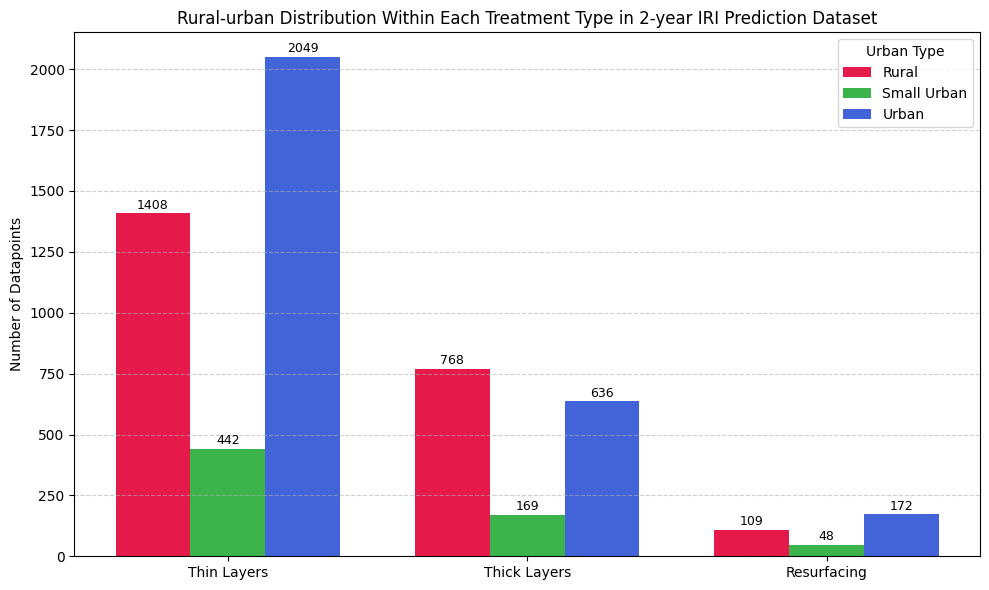

In [22]:
import matplotlib.pyplot as plt

# Automatically extract counts
counts = {
    "Thin Layers": {
        "Rural": df_thin_layers[df_thin_layers['Urban_Type_rural'] == 1].shape[0],
        "Small Urban": df_thin_layers[df_thin_layers['Urban_Type_small urban'] == 1].shape[0],
        "Urban": df_thin_layers[df_thin_layers['Urban_Type_urban'] == 1].shape[0]
    },
    "Thick Layers": {
        "Rural": df_thick_layers[df_thick_layers['Urban_Type_rural'] == 1].shape[0],
        "Small Urban": df_thick_layers[df_thick_layers['Urban_Type_small urban'] == 1].shape[0],
        "Urban": df_thick_layers[df_thick_layers['Urban_Type_urban'] == 1].shape[0]
    },
    "Resurfacing": {
        "Rural": df_resurf_[df_resurf_['Urban_Type_rural'] == 1].shape[0],
        "Small Urban": df_resurf_[df_resurf_['Urban_Type_small urban'] == 1].shape[0],
        "Urban": df_resurf_[df_resurf_['Urban_Type_urban'] == 1].shape[0]
    }
}

# Labels and categories
group_labels = list(counts.keys())  # Treatment types
urban_categories = ["Rural", "Small Urban", "Urban"]

# Restructure data for plotting
reversed_values = [[counts[t][cat] for t in group_labels] for cat in urban_categories]

# Plotting setup
x = range(len(group_labels))
width = 0.25

plt.figure(figsize=(10, 6))
colors = ['#e6194b', '#3cb44b', '#4363d8']

# Plot bars
for i, (category, color) in enumerate(zip(urban_categories, colors)):
    bar = plt.bar([p + width*i for p in x], reversed_values[i], width=width, label=category, color=color)
    for j, val in enumerate(reversed_values[i]):
        plt.text(j + width*i, val + 20, str(val), ha='center', fontsize=9)

# Axis formatting
plt.xticks([p + width for p in x], group_labels)
plt.ylabel("Number of Datapoints")
plt.title("Rural-urban Distribution Within Each Treatment Type in 2-year IRI Prediction Dataset")
plt.legend(title="Urban Type")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save and show
plt.show()

In [23]:
df_encoded_2017_2019.head(10)

AADT_mean_x  AADT_Single_Unit_mean_x  AADT_Combination_mean_x  \
0      22429.0                    767.0                   4163.0   
1      22429.0                    767.0                   4163.0   
2       1964.0                     92.0                      6.0   
3       1222.0                     33.0                      2.0   
4       2182.0                    175.0                    242.0   
5      19601.0                    568.0                    196.0   
6      14674.0                    264.0                    205.0   
7      35793.0                   1432.0                    107.0   
8      10559.0                    443.0                     74.0   
9       7007.0                    126.0                     98.0   

   Future_AADT_mean_x  IRI_mean_x  Thickness_Rigid_mean_x  \
0             22430.0       101.0                    10.0   
1             22430.0       128.0                    10.0   
2              2750.0       287.0                     0.0   
3              1710.0       271.0                     0.0   
4              3060.0       245.5                     0.0   
5             27440.0       196.5                     0.0   
6             27000.0       219.8                     0.0   
7             50110.0       209.9                     0.0   
8             19430.0       359.0                     0.0   
9              9810.0       127.0                     0.0   

   Thickness_Flexible_mean_x  Base_Thickness_mean_x  F_System_mode  \
0                        0.0                    6.0              1   
1                        0.0                    6.0              1   
2                        3.0                    8.0              3   
3                        3.0                    8.0              3   
4                        3.0                    8.0              3   
5                        3.0                    8.0              3   
6                        3.0                    8.0              3   
7                        3.0                    6.0              3   
8                        3.0                    8.0              3   
9                        3.0                    6.0              3   

   Surface_Type_mode  Base_Type_mode_x  Rutting_mean_x  \
0                  3                 2             0.0   
1                  3                 2             0.0   
2                  2                 3             0.1   
3                  2                 3             0.1   
4                  2                 3             0.3   
5                  2                 3             0.2   
6                  2                 3             0.2   
7                  2                 3             0.2   
8                  2                 3             0.1   
9                  2                 3             0.0   

   Cracking_Percent_mean_x  Faulting_mean_x  Last_Overlay_Thickness_mean_x  \
0                      0.0              0.0                            3.5   
1                      0.0              0.0                            3.5   
2                      0.0              0.0                            1.5   
3                      0.0              0.0                            1.5   
4                      0.0              0.0                            1.5   
5                      0.5              0.0                            1.5   
6                      4.8              0.0                            1.5   
7                      0.8              0.0                            1.5   
8                      1.0              0.0                            1.5   
9                      0.0              0.0                            1.5   

   IRI_mean_y  RHU_AV_x  FRZ_IDX_x  TEMP_AVG_x  PRECIPITATION_x  Age_x  \
0        89.0      76.0      896.3         7.3            979.6      8   
1       123.0      76.0      896.3         7.3            979.6      8   
2       176.0      67.6        1.1        20.3            894.7     72   
3       222.0    

In [24]:
## Data.drop(['Urban_Type'], axis=1, inplace=True)

In [25]:
df_encoded_2017_2019.shape

(5801, 27)

In [26]:
import os

# Define the directory path
dir_path = "/content/drive/MyDrive/Network Maintenace - With & without maintenace/conference-encoded-data/Treatment-encoded-dataset-2017-2019"

# Create the directory if it doesn't exist
os.makedirs(dir_path, exist_ok=True)

# Now save the file
df_encoded_2017_2019.to_csv(f"{dir_path}/df_encoded_2017_2019.csv", index=False)
